In [20]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.mlab as mlab
import matplotlib
from matplotlib import style
plt.style.use('Solarize_Light2')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

pd.options.mode.chained_assignment = None


In [21]:
###Import af data

dfklip = pd.read_csv('uge43klippelog.csv')

dfpogo = pd.read_csv('uge40moist.csv')

dfstimp = pd.read_csv('uge43stimp.csv')

dfevents = pd.read_csv('uge43events.csv')

print("Clipdata:")
print (dfklip.describe())

print("\nPogo:")
print (dfpogo.describe())

print("\nStimp:")
print(dfstimp.describe())

print("\nEvents")
print(dfevents.describe())

Clipdata:
               Hul
count  5140.000000
mean     10.500000
std       5.766842
min       1.000000
25%       5.750000
50%      10.500000
75%      15.250000
max      20.000000

Pogo:
          Dataset  Moisture (Avg) (%)  Moisture (Min) (%)  Moisture (Max) (%)
count  476.000000          476.000000          476.000000          476.000000
mean     1.002101           25.402521           18.701681           33.657563
std      0.045835            3.409731            4.143133            4.331326
min      1.000000           16.100000            0.000000           21.000000
25%      1.000000           22.900000           16.000000           31.000000
50%      1.000000           25.450000           18.500000           34.000000
75%      1.000000           27.800000           22.000000           37.000000
max      2.000000           34.600000           33.000000           46.000000

Stimp:
         Stimp CM  Bobble  Chatter  Snaking  Trueness
count  588.000000     0.0      0.0      0.0     

In [22]:
dfklip.head()

,Dato,Retning,Hul,Liter,Maskine,Højde,Bemærkning,Person,Cleanup,Brush,Rulle,Led,Unnamed: 12
0,16/04/2023,NaN,1,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,16/04/2023,NaN,2,6,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
2,16/04/2023,NaN,3,5,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
3,16/04/2023,NaN,4,8,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
4,16/04/2023,NaN,5,4,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN


In [23]:
###Datacleaning - Drop values + cols 



dfstimp = dfstimp[dfstimp.columns[:dfstimp.columns.get_loc('Stimp F') + 1]]
dfstimp = dfstimp.dropna(subset=['Dato'])


print(dfstimp.head())

         Dato     Hul  Stimp CM Stimp F
0  10/05/2024  Hul 15     249.0   8,169
1  10/05/2024  Hul 15     246.0   8,071
2  10/05/2024  Hul 15     248.0   8,136
3  10/05/2024  Hul 15     273.0   8,957
4  10/05/2024  Hul 15     280.0   9,186


In [24]:
### Datacleaning værdiger
dfklip['Liter'] = dfklip['Liter'].astype(str).str.replace(',','.')

dfstimp = dfstimp.rename(columns={'Stimp F': 'Stimp_F'})
dfstimp = dfstimp.rename(columns={'Stimp CM': 'Stimp_CM'})
dfstimp['Stimp_F'] = dfstimp['Stimp_F'].astype(str).str.replace(',','.').astype(float)

dfpogo[['Dato','Time']] = dfpogo['Sample Date'].str.split(' ', n=1,expand=True)
dfpogo = dfpogo.drop(columns=['Sample Date'])


In [25]:
def categorize_stimp(stimp):
    if pd.isna(stimp):
        return None
    elif stimp < 9:
        return 'Low'
    elif 10 <= stimp <= 10.5:
        return 'Target range'
    else:
        return 'High'
    
dfstimp['Stimp_range'] = dfstimp['Stimp_F'].apply(categorize_stimp)


In [26]:
###Datacleaning Dato til pd.datetime
from datetime import datetime, timedelta

dfklip['Dato'] = pd.to_datetime(dfklip['Dato'], format='%d/%m/%Y', dayfirst=True)
dfstimp['Dato'] = pd.to_datetime(dfstimp['Dato'], format='%d/%m/%Y', dayfirst=True)
dfpogo['Dato'] = pd.to_datetime(dfpogo['Dato'], format='%Y-%m-%d')
dfevents['Dato'] = pd.to_datetime(dfevents['Dato'], format='%d/%m/%Y')

dfklip['Week'] = dfklip['Dato'].dt.isocalendar().week
dfstimp['Week'] = dfstimp['Dato'].dt.isocalendar().week
dfpogo['Week'] = dfpogo['Dato'].dt.isocalendar().week
dfevents['Week'] = dfevents['Dato'].dt.isocalendar().week

dfklip['Year'] = dfklip['Dato'].dt.year
dfstimp['Year'] = dfstimp['Dato'].dt.year
dfpogo['Year']  = dfpogo['Dato'].dt.year
dfevents['Year']= dfevents['Dato'].dt.year


print("Cleaned dfklip:")
print(dfklip.head())
print("\nCleaned dfstimp:")
print(dfstimp.head())
print("\nCleaned dfpogo:")
print(dfpogo.head())
print("\nCleaned Events:")
print(dfevents.describe())

Cleaned dfklip:
        Dato Retning  Hul Liter Maskine Højde Bemærkning Person Cleanup Brush  \
0 2023-04-16     NaN    1     4     NaN   NaN        NaN    NaN      No   NaN   
1 2023-04-16     NaN    2     6     NaN   NaN        NaN    NaN      No   NaN   
2 2023-04-16     NaN    3     5     NaN   NaN        NaN    NaN      No   NaN   
3 2023-04-16     NaN    4     8     NaN   NaN        NaN    NaN      No   NaN   
4 2023-04-16     NaN    5     4     NaN   NaN        NaN    NaN      No   NaN   

  Rulle  Led Unnamed: 12  Week    Year  
0   NaN  NaN         NaN    15  2023.0  
1   NaN  NaN         NaN    15  2023.0  
2   NaN  NaN         NaN    15  2023.0  
3   NaN  NaN         NaN    15  2023.0  
4   NaN  NaN         NaN    15  2023.0  

Cleaned dfstimp:
        Dato     Hul  Stimp_CM  Stimp_F Stimp_range  Week  Year
0 2024-05-10  Hul 15     249.0    8.169         Low    19  2024
1 2024-05-10  Hul 15     246.0    8.071         Low    19  2024
2 2024-05-10  Hul 15     248.0    8.136  

<function matplotlib.pyplot.show(close=None, block=None)>

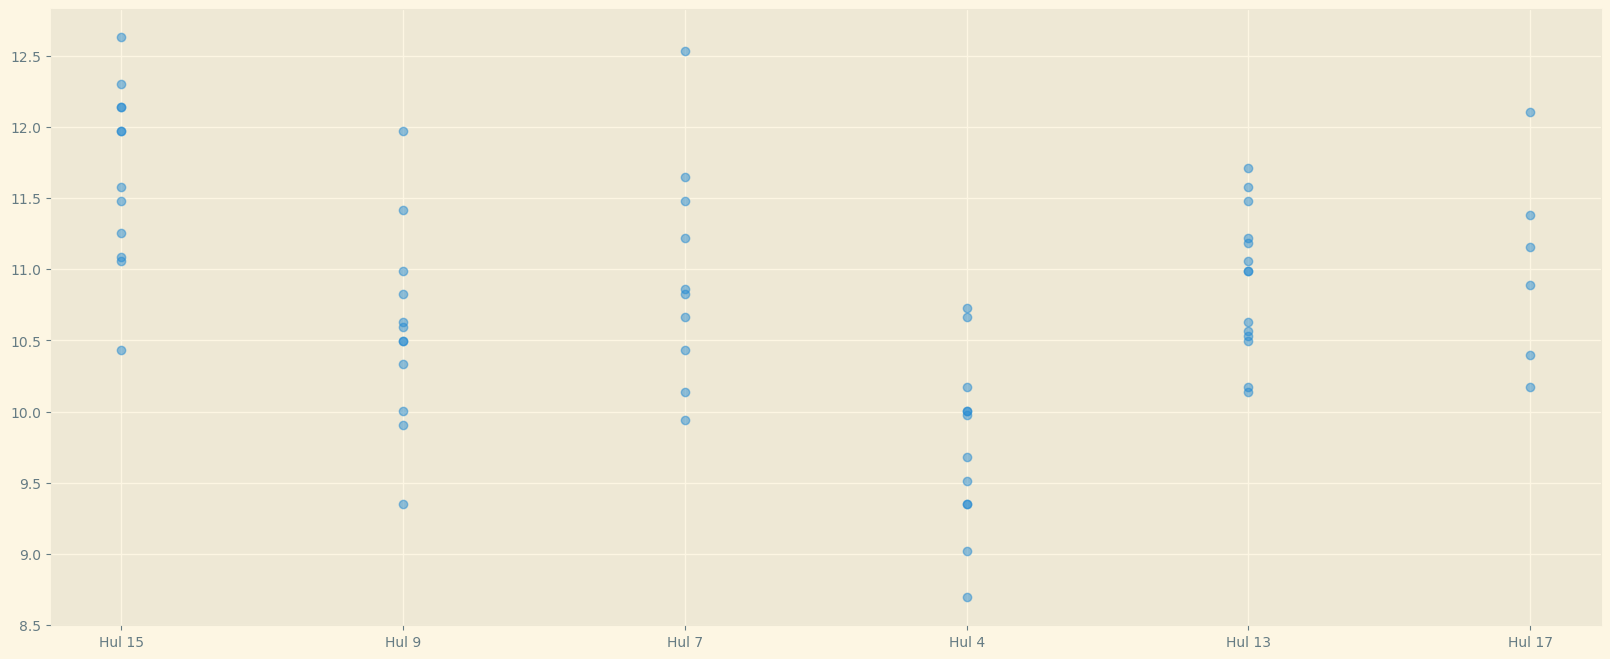

In [27]:
uge_29_stimp = dfstimp[dfstimp['Week'] == 38]

plt.figure(figsize=(20,8))
plt.scatter(uge_29_stimp['Hul'],uge_29_stimp['Stimp_F'],alpha=0.5)
plt.show



Average ml/m2 per Green:
    Hul  ml_per_m2
0     1  17.366062
1     2  16.597510
2     3  16.411998
3     4  20.084830
4     5  16.778523
5     6  18.266667
6     7  17.236467
7     8  18.058691
8     9  16.140351
9    10  20.274914
10   11  17.254902
11   12  19.503546
12   13  18.575324
13   14  18.654434
14   15  15.911172
15   16  21.146617
16   17  20.998677
17   18  16.588603
18   19  10.063320
19   20   8.515815


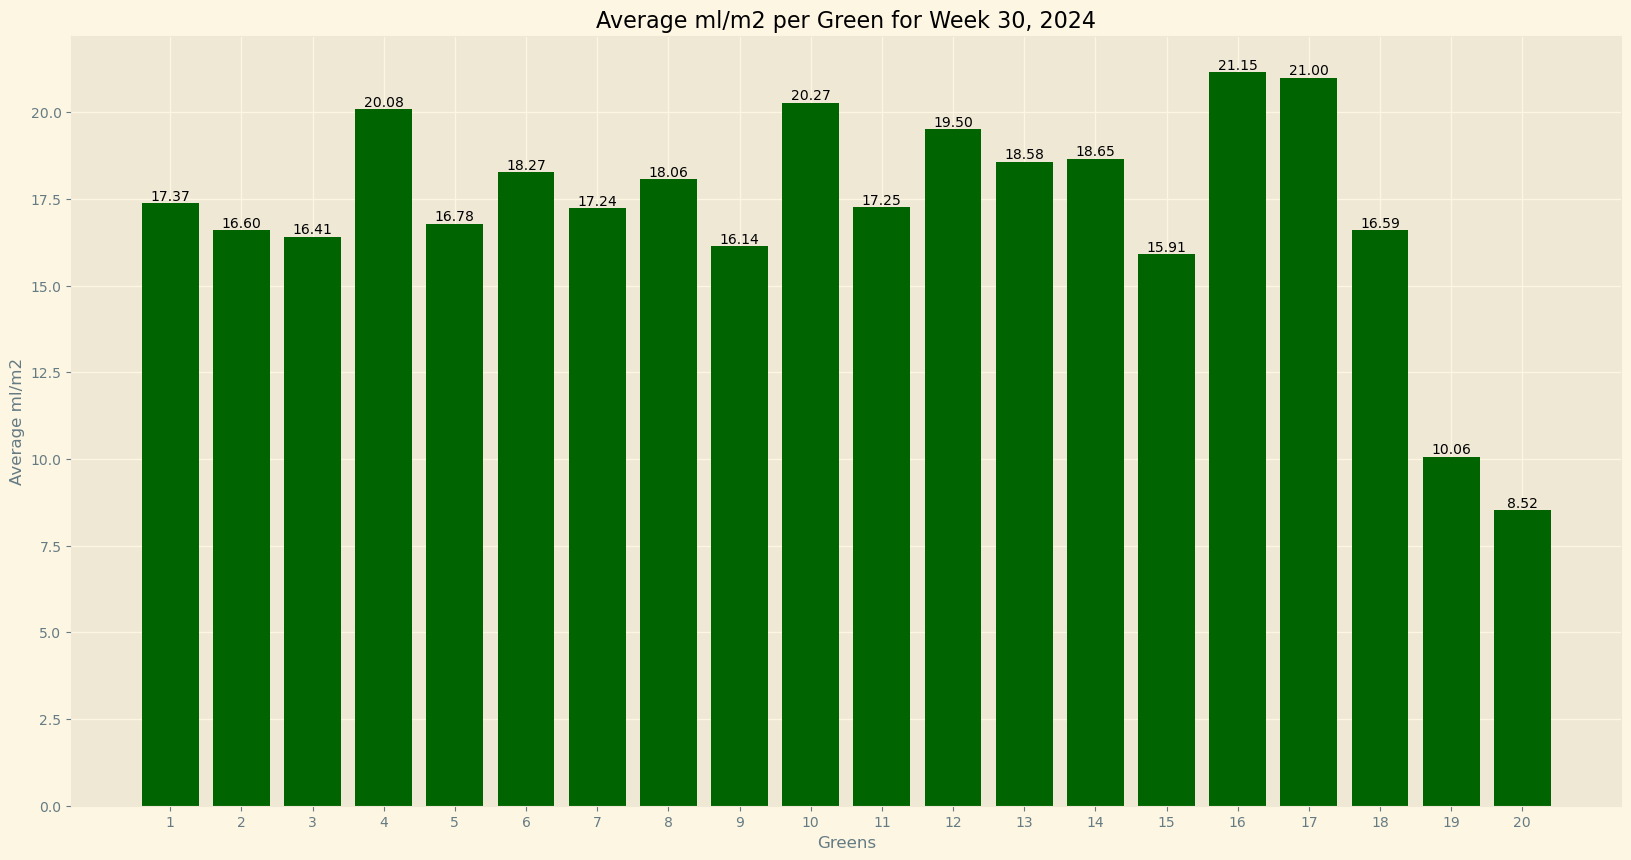

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

###ÆNDRE HER FOR ANDEN UGE 
mlm2_uge = dfklip[(dfklip['Week'] == 30) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string for matching green sizes
mlm2_uge['Hul'] = mlm2_uge['Hul'].astype(str)

# Calculate ml/m²
mlm2_uge['Green Size'] = mlm2_uge['Hul'].map(green_sizes)
mlm2_uge['Liter'] = mlm2_uge['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_uge['ml_per_m2'] = (mlm2_uge['Liter'] * 1000) / mlm2_uge['Green Size']

# Group by 'Hul' to calculate the average ml_per_m2 per green
average_ml_per_m2 = mlm2_uge.groupby('Hul')['ml_per_m2'].mean().reset_index()

# Ensure all 'Hul' values from 1 to 20 are included
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Print the result
print("Average ml/m2 per Green:")
print(average_ml_per_m2)

# Plot the result as a bar plot with darker green bars and labels
plt.figure(figsize=(20, 10))
bars = plt.bar(average_ml_per_m2['Hul'], average_ml_per_m2['ml_per_m2'], color='darkgreen')
plt.xlabel('Greens')
plt.ylabel('Average ml/m2')
plt.title('Average ml/m2 per Green for Week 30, 2024')
plt.xticks(ticks=average_ml_per_m2['Hul'], labels=average_ml_per_m2['Hul'])

# Add labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

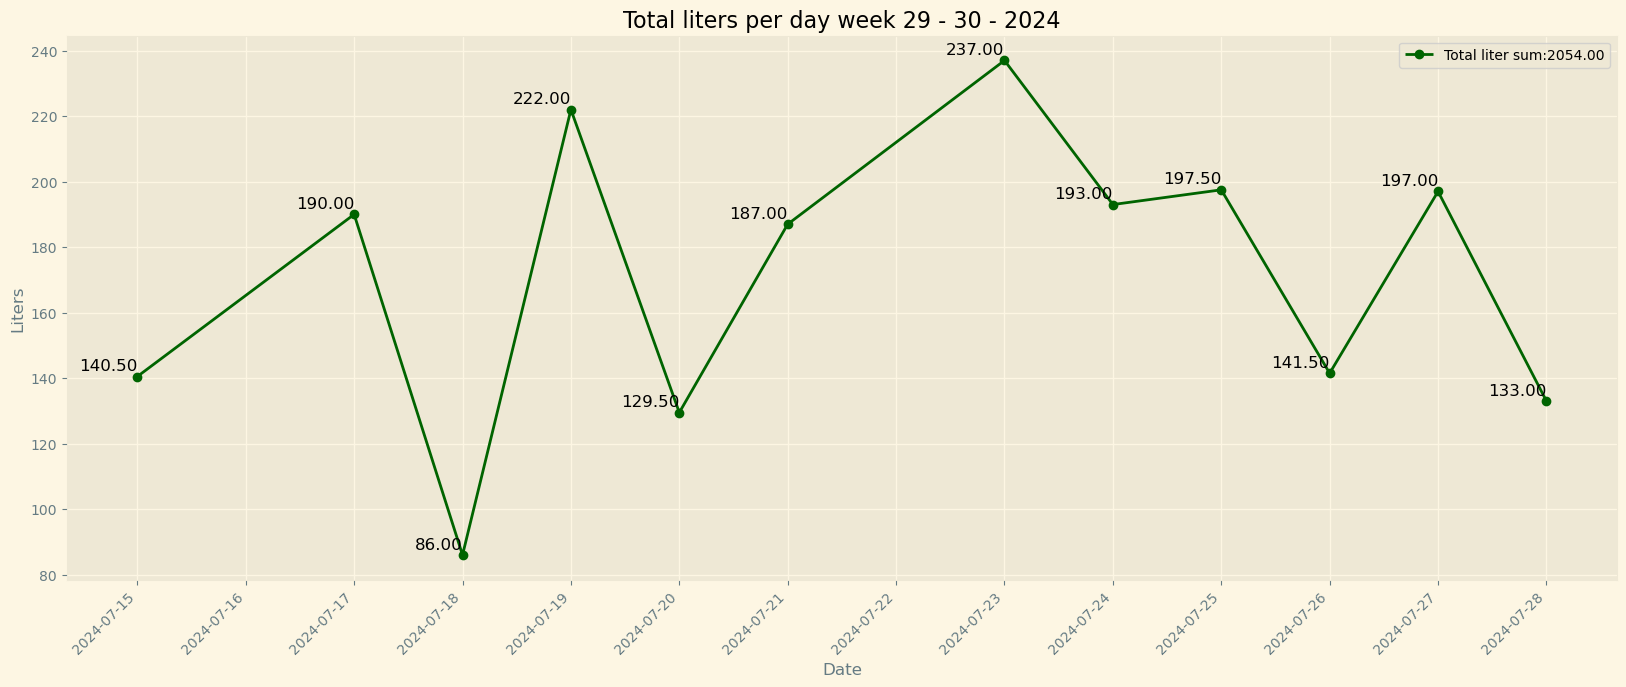

In [29]:
import matplotlib.dates as mdates
# Filter the data for the specific week and year
weeks = [29,30]
line_uge = dfklip[(dfklip['Week'].isin(weeks)) & (dfklip['Year'] == 2024)]

line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)




# Group the data by 'dato' and sum the 'Liter' column
line_liter = line_uge.groupby('Dato')['Liter'].sum()
total_week_liters =line_liter.sum()
# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o',color='darkgreen')
plt.title('Total liters per day week 29 - 30 - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())


# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

plt.legend([f'Total liter sum:{total_week_liters:.2f}'], loc='upper right')

plt.show()



      Hul   Stimp_F
0  Hul 15  11.08100
1   Hul 4   9.87525
2   Hul 7  10.52325
3   Hul 9  10.04750

Stimp_avg_Uge 10.38175


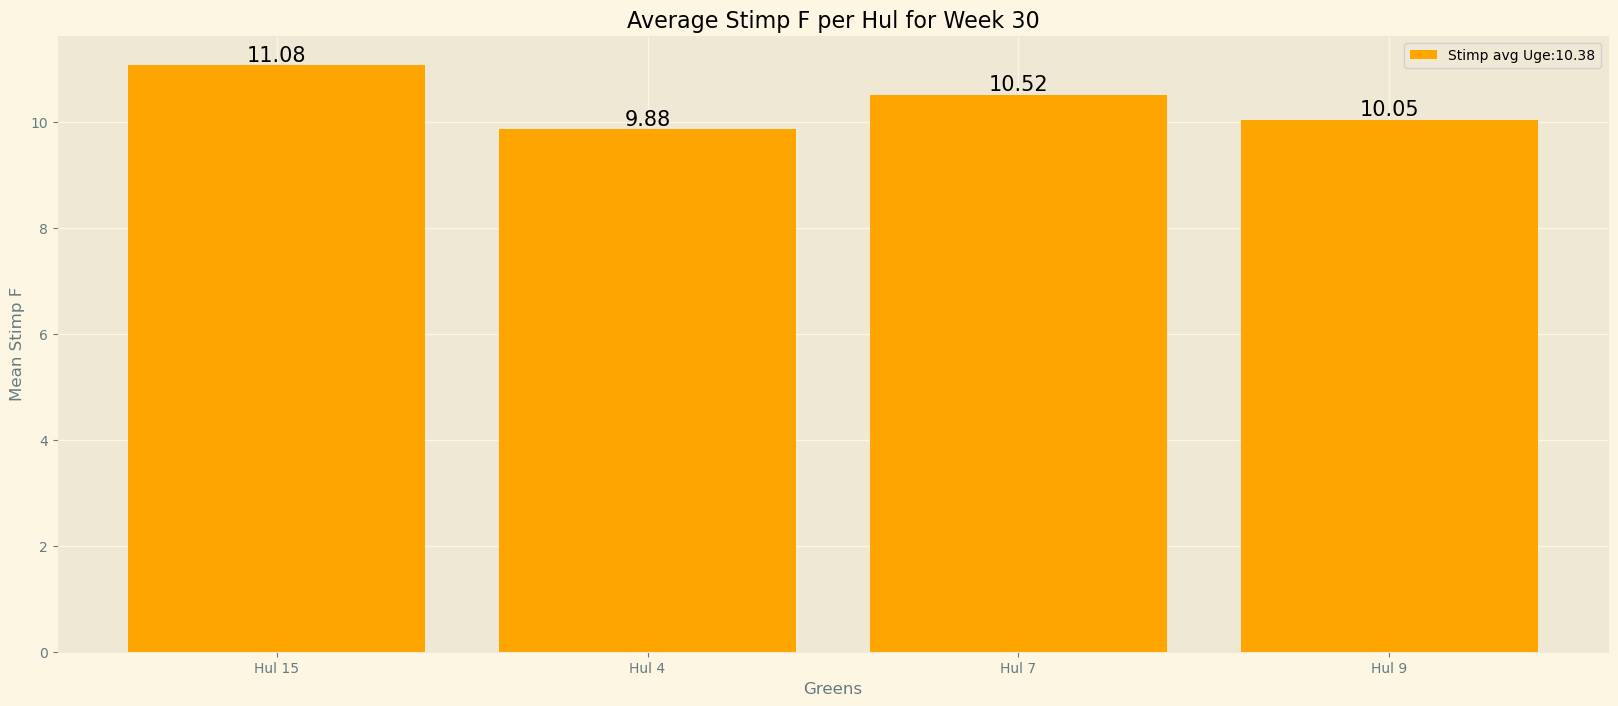

In [30]:
###ÆNDRE HER FOR ANDEN UGE 
stimp_uge = dfstimp[(dfstimp['Week'] == 30) & (dfstimp['Year'] == 2024)]



mean_stimp = stimp_uge.groupby('Hul')['Stimp_F'].mean().reset_index()
stimp_avg_Uge = stimp_uge['Stimp_F'].mean()

# Print the result to ensure it is correct
print(mean_stimp)
print("\nStimp_avg_Uge",stimp_avg_Uge)
# Plot the bar chart
plt.figure(figsize=(20, 8))
bars = plt.bar(mean_stimp['Hul'], mean_stimp['Stimp_F'], color='orange')
plt.xlabel('Greens')
plt.ylabel('Mean Stimp F')
plt.title('Average Stimp F per Hul for Week 30')
plt.xticks(mean_stimp['Hul'])

# Add labels on top of the bars
for index, row in mean_stimp.iterrows():
    plt.text(row['Hul'], row['Stimp_F'], f'{row["Stimp_F"]:.2f}', ha='center', va='bottom', fontsize=15)

plt.legend([f'Stimp avg Uge:{stimp_avg_Uge:.2f}'], loc='upper right')

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

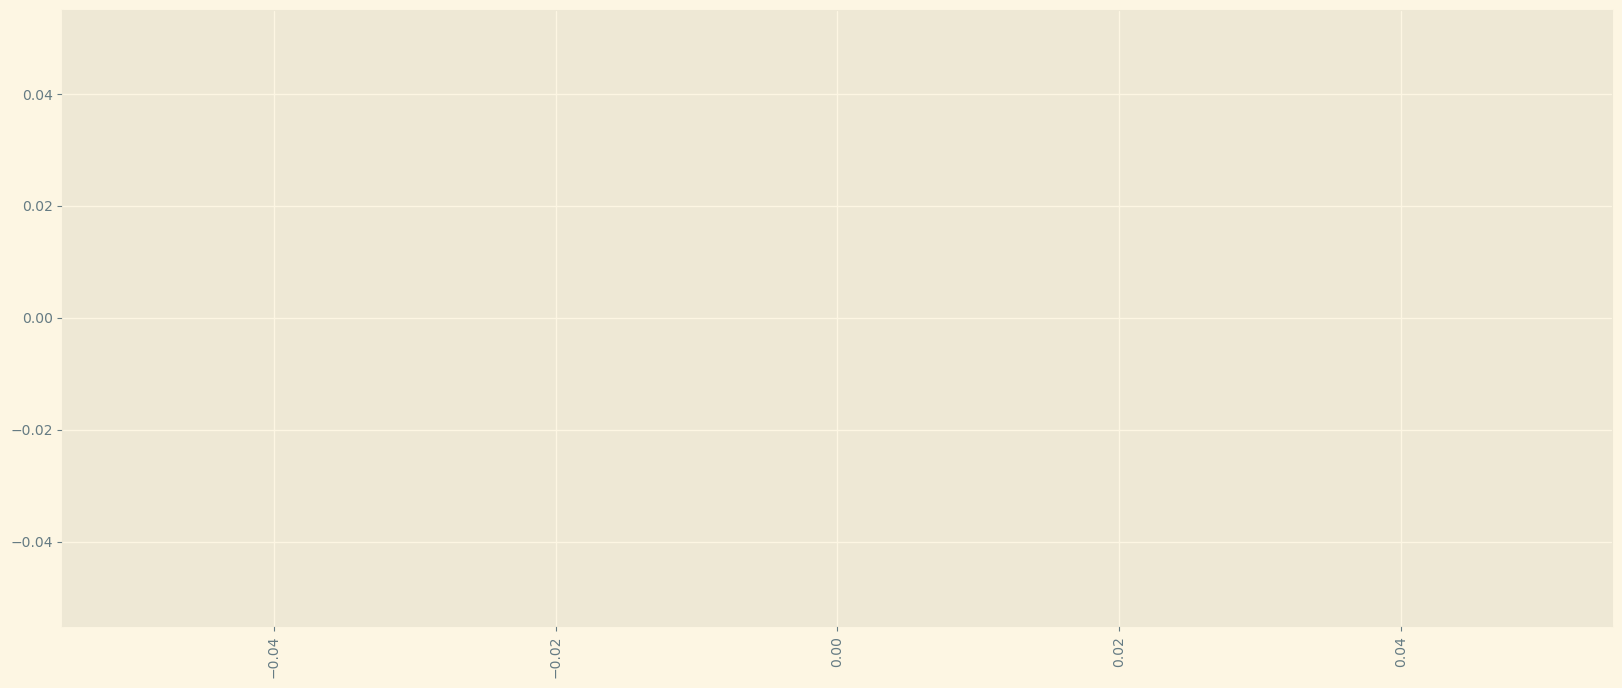

In [31]:
moistweek = dfpogo[(dfpogo['Week'] == 30) & (dfpogo['Year'] == 2024)]

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = moistweek.groupby(['Zone'])['Moisture (Avg) (%)'].mean()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['skyblue'])
plt.title('Average Soil Moisture week 29')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')

# Adding a red dotted line at 11%
plt.axhline(y=11, color='red', linestyle='--', linewidth=1, label='Critical low')

# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, title='Date', loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()

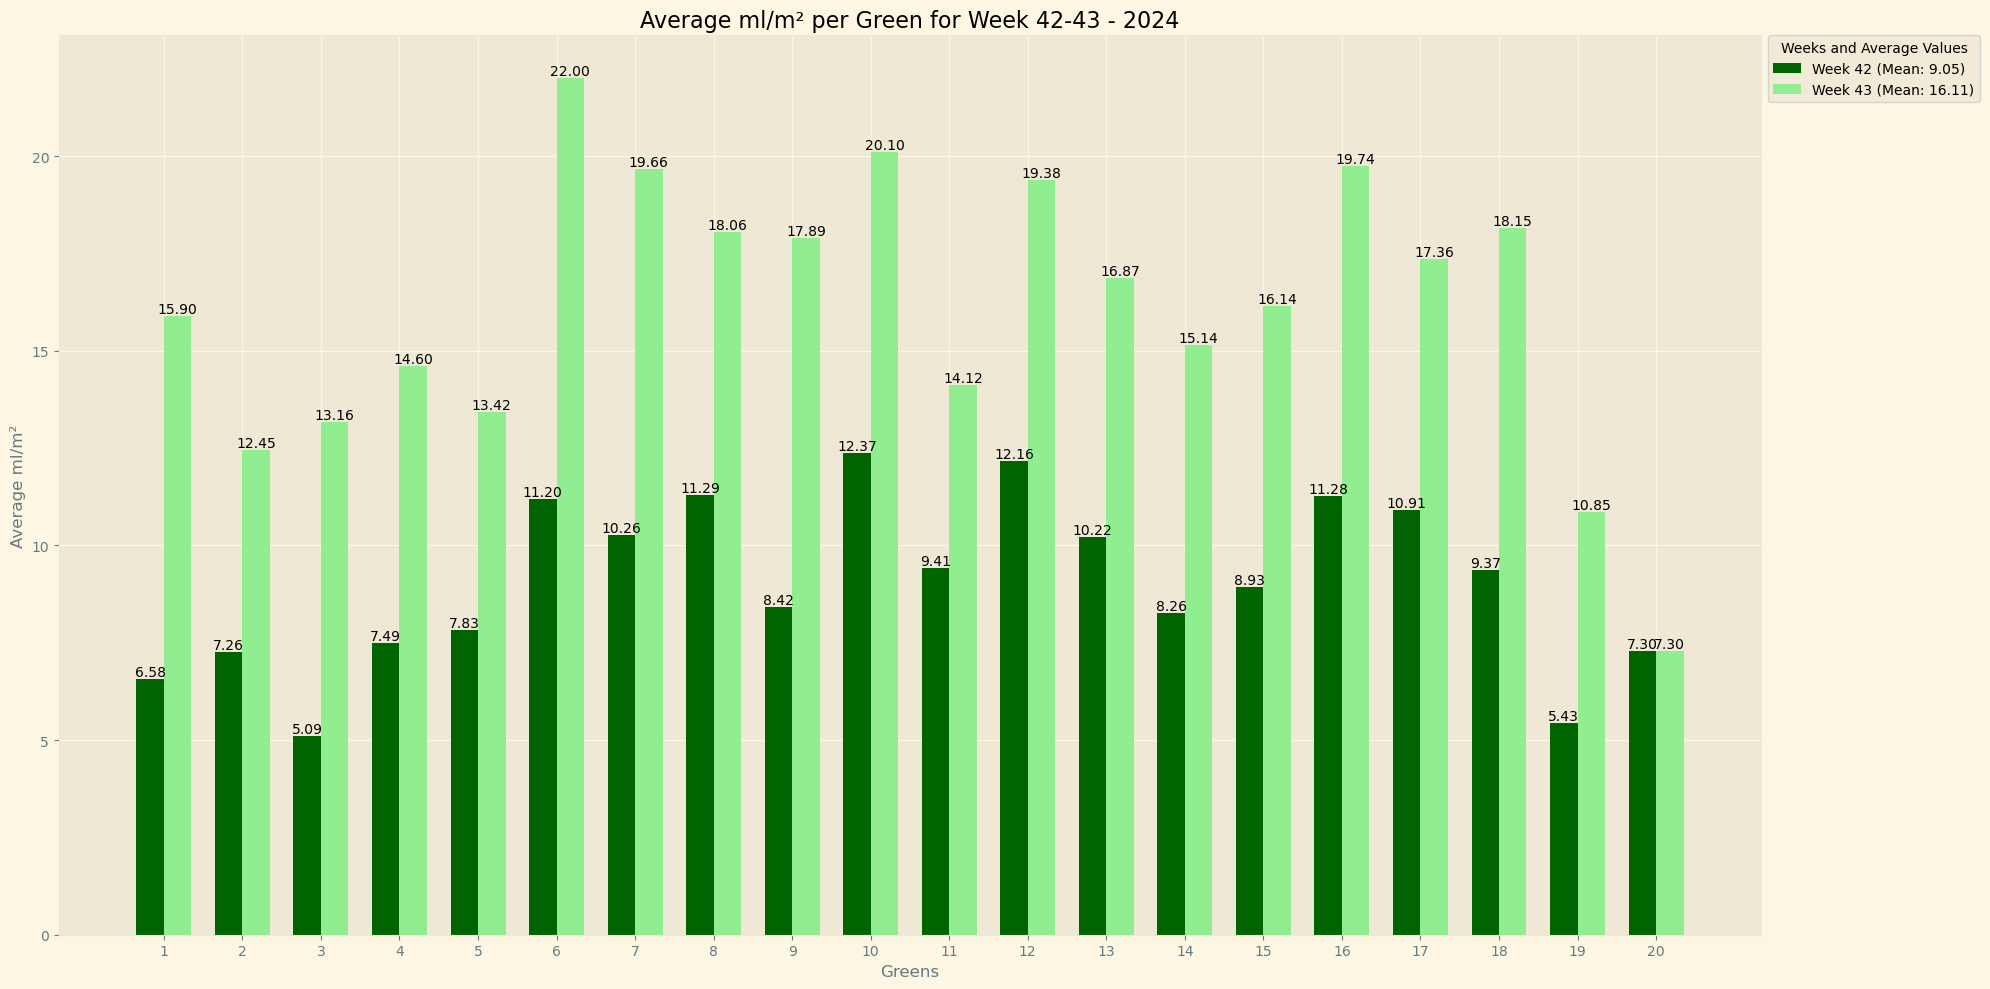

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Green sizes dictionary
green_sizes = {
    '1': 455.87, '2': 482, '3': 589, '4': 668, '5': 447, '6': 625, '7': 585, '8': 443, '9': 475, '10': 485,
    '11': 425, '12': 658, '13': 489, '14': 545, '15': 728, '16': 532, '17': 504, '18': 427, '19': 737, '20': 274
}

# Filter data for weeks 37 and 38
weeks = [42, 43]
mlm2_weeks = dfklip[(dfklip['Dato'].dt.isocalendar().week.isin(weeks)) & (dfklip['Dato'].dt.year == 2024)]

# Ensure 'Hul' is string for matching green sizes
mlm2_weeks['Hul'] = mlm2_weeks['Hul'].astype(str)

# Calculate ml/m²
mlm2_weeks['Green Size'] = mlm2_weeks['Hul'].map(green_sizes)
mlm2_weeks['Liter'] = mlm2_weeks['Liter'].astype(str).str.replace(',', '.').astype(float)
mlm2_weeks['ml_per_m2'] = (mlm2_weeks['Liter'] * 1000) / mlm2_weeks['Green Size']

# Group by 'Hul' and 'Week' to calculate the average ml_per_m2 per green per week
mlm2_weeks['Week'] = mlm2_weeks['Dato'].dt.isocalendar().week
average_ml_per_m2 = mlm2_weeks.groupby(['Hul', 'Week'])['ml_per_m2'].mean().reset_index()

# Ensure all 'Hul' values from 1 to 20 are included for each week
all_huls = pd.DataFrame({'Hul': [str(i) for i in range(1, 21)]})
average_ml_per_m2 = average_ml_per_m2.pivot(index='Hul', columns='Week', values='ml_per_m2').reset_index()
average_ml_per_m2 = all_huls.merge(average_ml_per_m2, on='Hul', how='left').fillna(0)

# Convert 'Hul' back to integers for sorting and plotting
average_ml_per_m2['Hul'] = average_ml_per_m2['Hul'].astype(int)
average_ml_per_m2 = average_ml_per_m2.sort_values('Hul')

# Calculate the mean ml/m² for each week
mean_week1 = average_ml_per_m2[42].mean()
mean_week2 = average_ml_per_m2[43].mean()

# Plot the result as a bar plot with two bars per 'Hul' for each week
fig, ax = plt.subplots(figsize=(20, 10))
bar_width = 0.35
index = average_ml_per_m2['Hul']

bar1 = ax.bar(index - bar_width/2, average_ml_per_m2[42], bar_width, label=f'Week 42 (Mean: {mean_week1:.2f})', color='darkgreen')
bar2 = ax.bar(index + bar_width/2, average_ml_per_m2[43], bar_width, label=f'Week 43 (Mean: {mean_week2:.2f})', color='lightgreen')

ax.set_xlabel('Greens')
ax.set_ylabel('Average ml/m²')
ax.set_title('Average ml/m² per Green for Week 42-43 - 2024')
ax.set_xticks(index)
ax.set_xticklabels(average_ml_per_m2['Hul'])

# Move the legend to the right of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.963), title='Weeks and Average Values')

# Add labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust the layout to fit the legend
plt.tight_layout()

# Show the plot
plt.show()



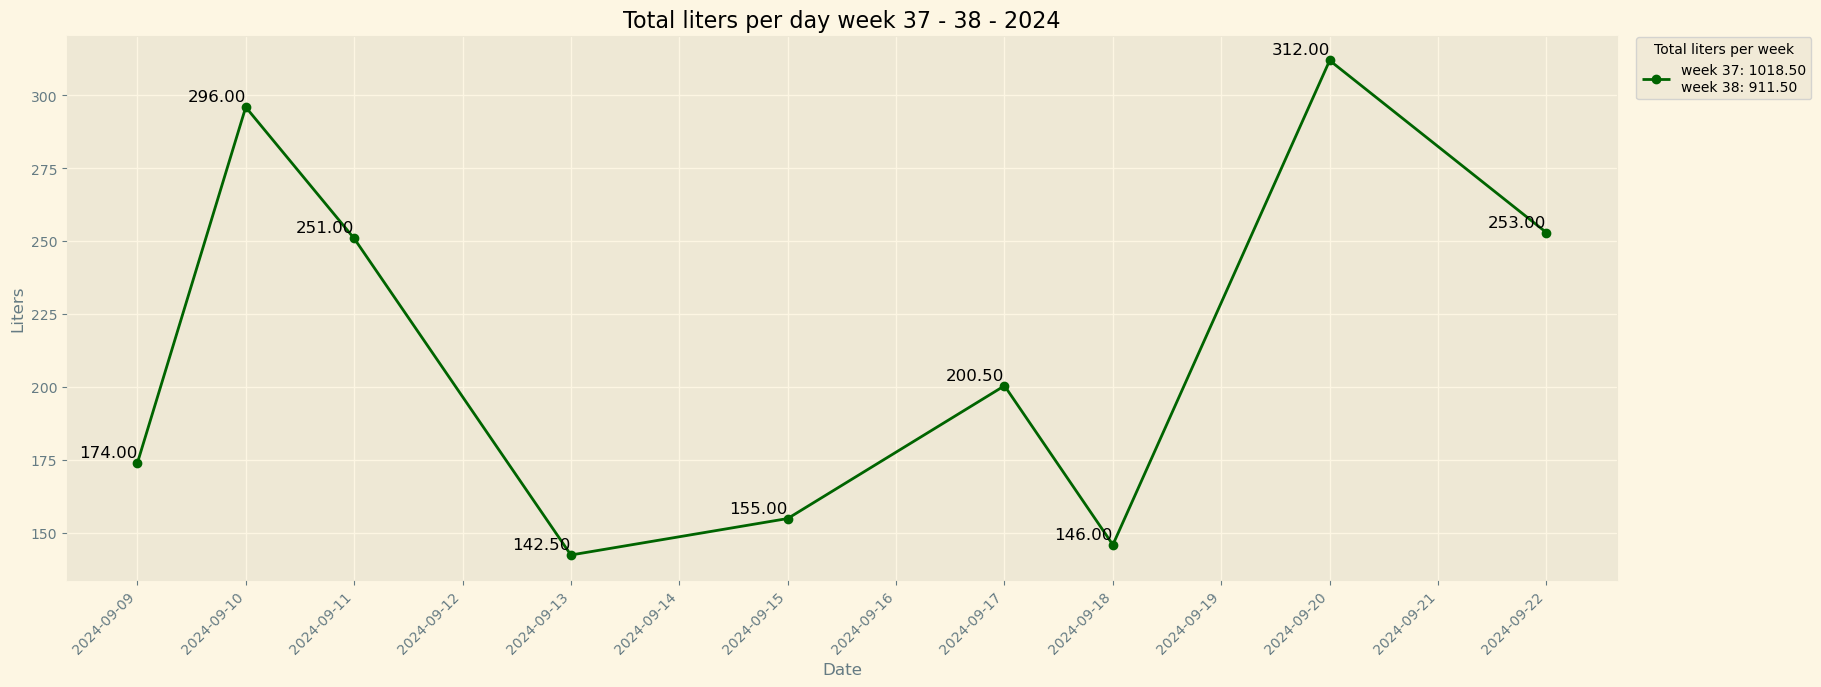

In [22]:
weeks = [37, 38]
line_uge = dfklip[(dfklip['Week'].isin(weeks)) & (dfklip['Year'] == 2024)]

line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group the data by 'Dato' and sum the 'Liter' column
line_liter = line_uge.groupby('Dato')['Liter'].sum()

# Calculate total liters for each week separately
total_week_30_liters = line_uge[line_uge['Week'] == 37]['Liter'].sum()
total_week_31_liters = line_uge[line_uge['Week'] == 38]['Liter'].sum()

# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title('Total liters per day week 37 - 38 - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Update the legend to show totals for week 29 and week 30
plt.legend([f'week 37: {total_week_30_liters:.2f}\nweek 38: {total_week_31_liters:.2f}'], loc='upper right',title='Total liters per week',bbox_to_anchor=(1.13, 1.01))

plt.show()

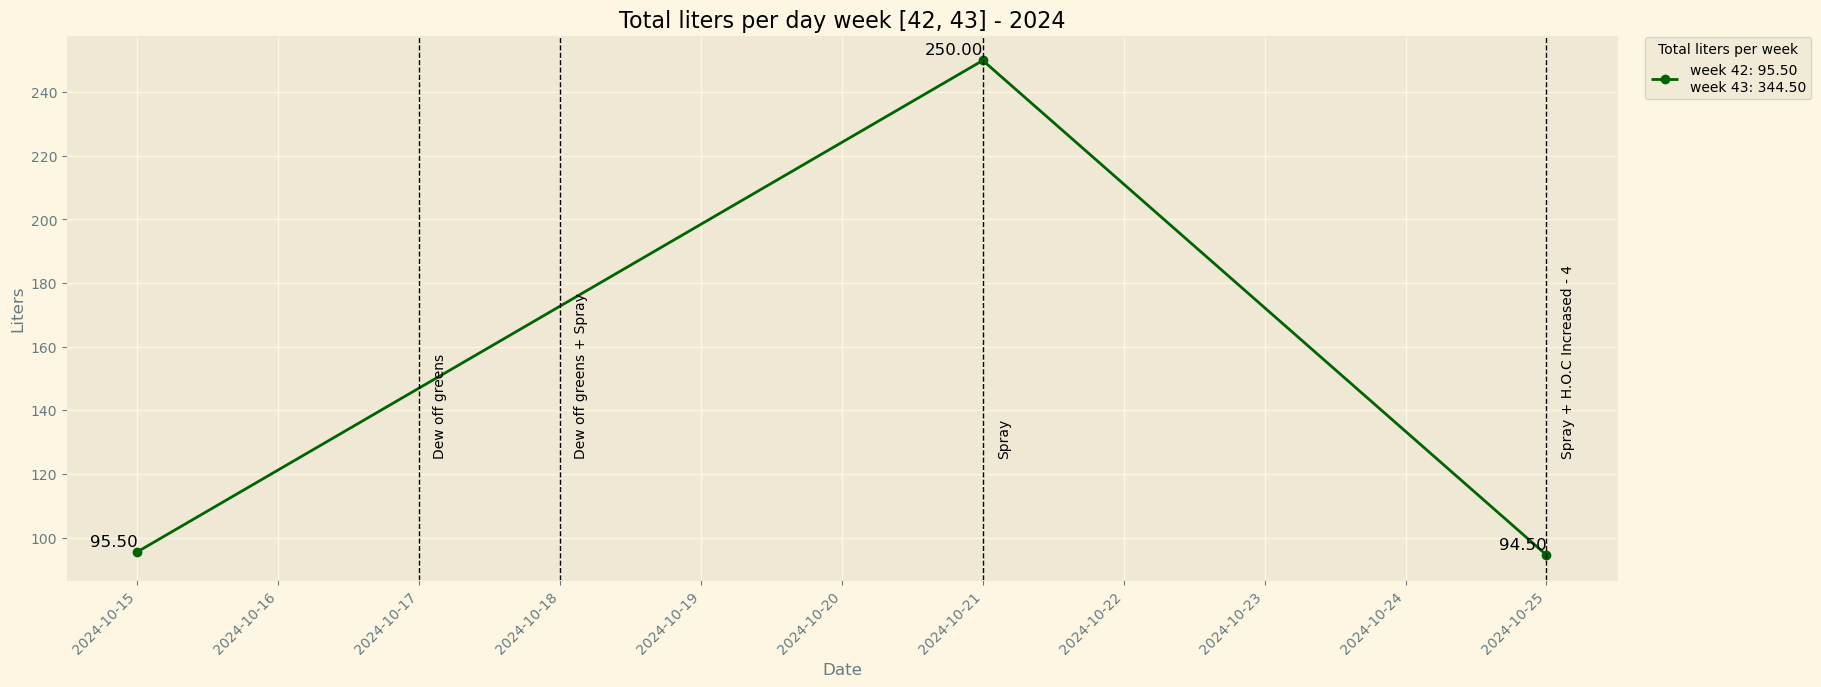

In [42]:
# Filter data for weeks 37 and 38 in 2024
weeks = [42, 43]
line_uge = dfklip[(dfklip['Week'].isin(weeks)) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string and 'Liter' is properly formatted
line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group the data by 'Dato' and sum the 'Liter' column
line_liter = line_uge.groupby('Dato')['Liter'].sum()

# Calculate total liters for each week separately
total_week_37_liters = line_uge[line_uge['Week'] == 42]['Liter'].sum()
total_week_38_liters = line_uge[line_uge['Week'] == 43]['Liter'].sum()

# Filter and group events for weeks 37 and 38, excluding specific events
filtered_events = dfevents[(dfevents['Week'].isin(weeks)) & 
                           (dfevents['Year'] == 2024) & 
                           (~dfevents['Event'].isin(['Cut greens', 'Roll greens']))]

# Group by date and join multiple events with '+'
grouped_events = filtered_events.groupby('Dato')['Event'].apply(lambda events: ' + '.join(events)).reset_index()

# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title(f'Total liters per day week {weeks:} - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add vertical lines and event annotations, spaced with '+'
for _, row in grouped_events.iterrows():
    plt.axvline(x=row['Dato'], color='black', linestyle='--', linewidth=1)
    plt.text(row['Dato'] + pd.Timedelta(days=0.1), line_liter.max() * 0.5, row['Event'], 
             rotation=90, verticalalignment='bottom')

# Update the legend to show totals for week 37 and week 38
plt.legend([f'week 42: {total_week_37_liters:.2f}\nweek 43: {total_week_38_liters:.2f}'], 
           loc='upper right', title='Total liters per week', bbox_to_anchor=(1.13, 1.01))

plt.show()

Week  Hul      42        43
0       7  9.8095  11.30250
1       9  9.4650   9.80150
2      13  9.1370  10.19525
3      15  9.8260  10.87600

Stimp_avg_29 9.559375
Stimp_avg_30 10.435428571428572


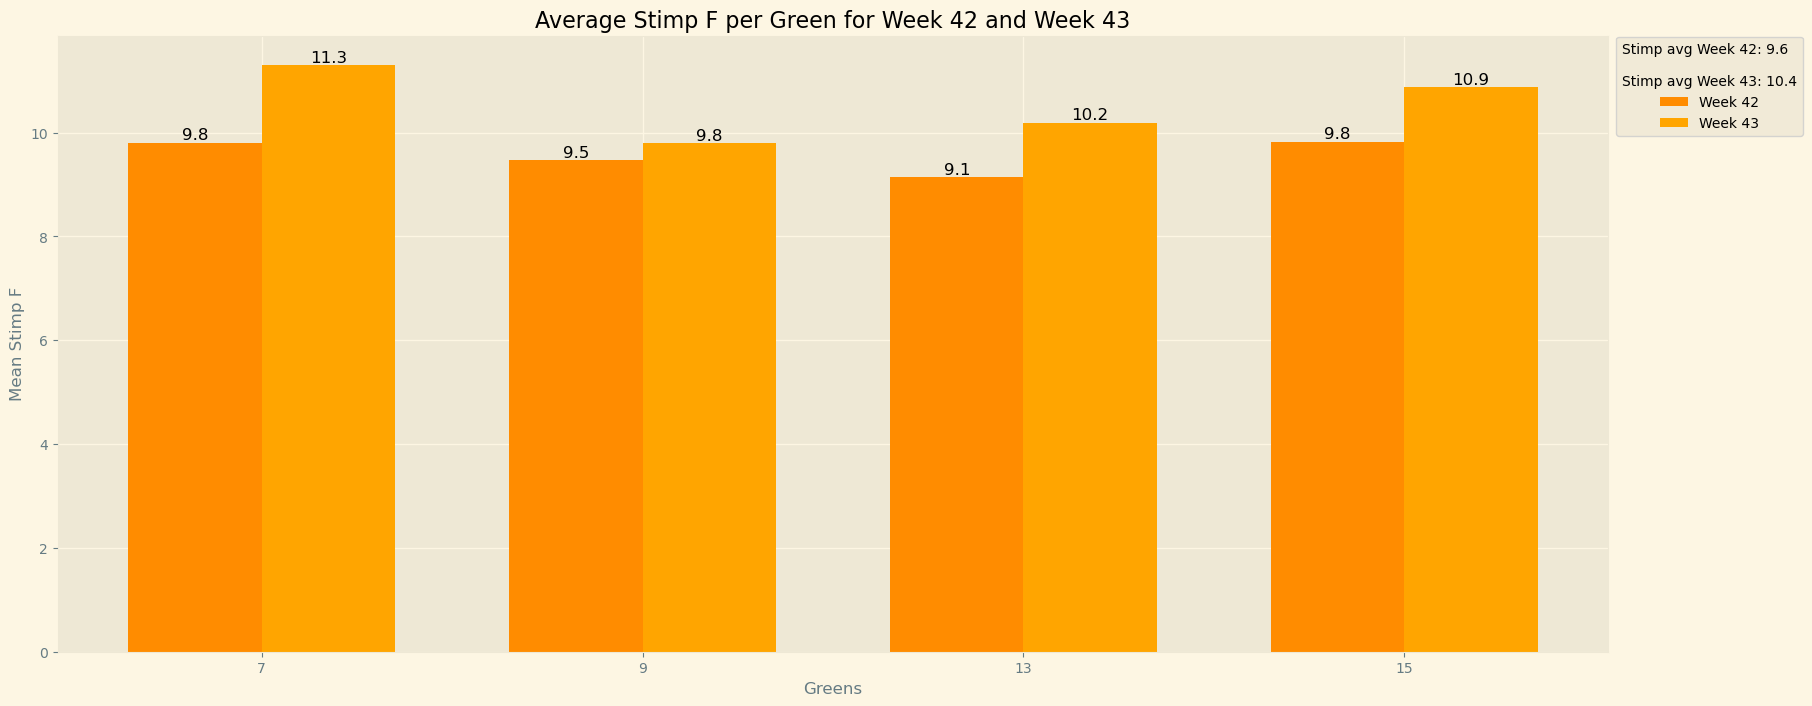

In [44]:
dfstimp['Hul'] = dfstimp['Hul'].astype(str)

# Remove non-numeric parts from 'Hul'
dfstimp['Hul'] = dfstimp['Hul'].str.extract('(\d+)').astype(int)

weeks = [42, 43]
stimp_uge = dfstimp[(dfstimp['Week'].isin(weeks)) & (dfstimp['Year'] == 2024)]

# Group by 'Hul' and 'Week' to calculate the mean Stimp F per green per week
mean_stimp = stimp_uge.groupby(['Hul', 'Week'])['Stimp_F'].mean().reset_index()

# Pivot the data to have weeks as columns
mean_stimp_pivot = mean_stimp.pivot(index='Hul', columns='Week', values='Stimp_F').reset_index().fillna(0)

# Calculate the overall average Stimp F for each week
stimp_avg_30 = stimp_uge[stimp_uge['Week'] == 42]['Stimp_F'].mean()
stimp_avg_31 = stimp_uge[stimp_uge['Week'] == 43]['Stimp_F'].mean()

# Print the result to ensure it is correct
print(mean_stimp_pivot)
print("\nStimp_avg_29", stimp_avg_30)
print("Stimp_avg_30", stimp_avg_31)

# Plot the bar chart with two bars per 'Hul' for each week
fig, ax = plt.subplots(figsize=(20, 8))
bar_width = 0.35
index = range(len(mean_stimp_pivot))

bar1 = ax.bar([i - bar_width/2 for i in index], mean_stimp_pivot[42], bar_width, label='Week 42', color='darkorange')
bar2 = ax.bar([i + bar_width/2 for i in index], mean_stimp_pivot[43], bar_width, label='Week 43', color='orange')

ax.set_xlabel('Greens')
ax.set_ylabel('Mean Stimp F')
ax.set_title('Average Stimp F per Green for Week 42 and Week 43')
ax.set_xticks(index)
ax.set_xticklabels(mean_stimp_pivot['Hul'])
ax.legend(title=f'Stimp avg Week 42: {stimp_avg_30:.1f} \n\nStimp avg Week 43: {stimp_avg_31:.1f}', loc='upper right', bbox_to_anchor=(1.13, 1.01))

# Add labels on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.show()

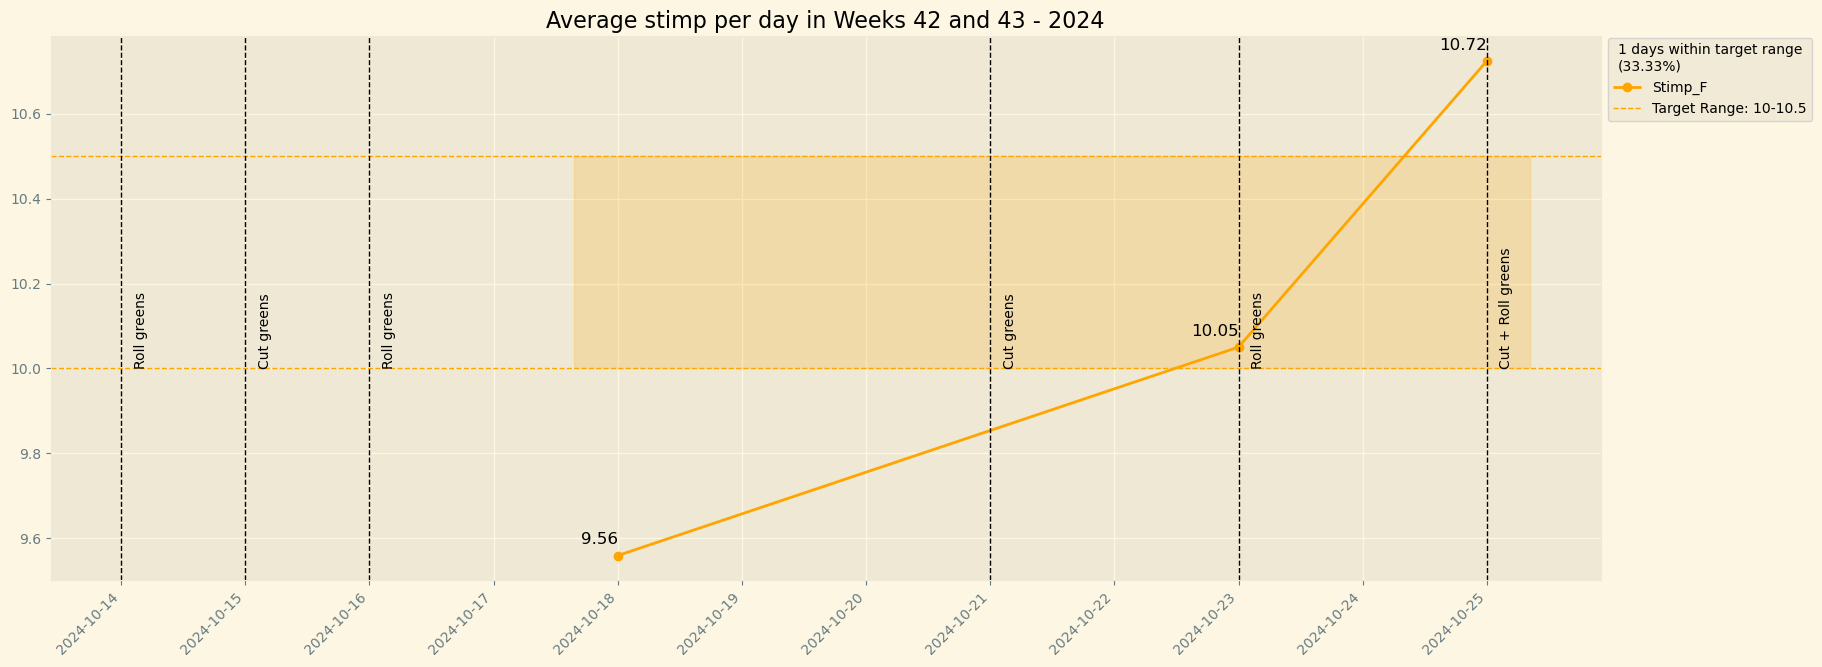

In [50]:
filtered_stimp_df = dfstimp[(dfstimp['Week'].isin([42, 43])) & (dfstimp['Year'] == 2024)]

# Group by 'Dato' and calculate the mean of 'Stimp_F' for the correct weeks
mean_stimp_f = filtered_stimp_df.groupby('Dato')['Stimp_F'].mean()

# Filter the green events to include only weeks 37 and 38 in 2024
filtered_green_events = dfevents[
    (dfevents['Dato'].dt.isocalendar().week.isin([42, 43])) & 
    (dfevents['Dato'].dt.year == 2024) & 
    dfevents['Event'].isin(['Roll greens', 'Cut greens'])
].drop_duplicates()

# Recreate the combined event description for dates where both events occurred
combined_event_description = {}
for date, group in filtered_green_events.groupby('Dato'):
    events = group['Event'].unique()
    if len(events) > 1:
        combined_event_description[date] = 'Cut + Roll greens'
    else:
        combined_event_description[date] = events[0]

# Define the target range
target_min = 10
target_max = 10.5

# Recalculate the count and percentage within the target range
in_target_range = mean_stimp_f[(mean_stimp_f >= target_min) & (mean_stimp_f <= target_max)].count()
total_days = mean_stimp_f.count()
percentage_in_target_range = (in_target_range / total_days) * 100

# Plot the line graph for mean stimp f per day for the correct weeks
plt.figure(figsize=(20, 8))
mean_stimp_f.plot(kind='line', marker='o', color='orange')
plt.title('Average stimp per day in Weeks 42 and 43 - 2024')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Add horizontal lines for the target range
plt.axhline(y=target_min, color='orange', linestyle='--', linewidth=1, label=f'Target Range: {target_min}-{target_max}')
plt.axhline(y=target_max, color='orange', linestyle='--', linewidth=1)

# Shade the area between the target range
plt.fill_between(ax.get_xlim(), target_min, target_max, color='orange', alpha=0.2)

# Add vertical lines for the dates where events occurred and annotate the events
for date, description in combined_event_description.items():
    plt.axvline(x=date, color='black', linestyle='--', linewidth=1)
    # Add a small offset to move the text further from the line
    plt.text(date + pd.Timedelta(days=0.101), target_max - 0.5, description, rotation=90, verticalalignment='bottom')


# Annotate each data point with its value
for x, y in zip(mean_stimp_f.index, mean_stimp_f.values):
    plt.text(x, y + 0.02, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add the count and percentage to the legend
legend_text = (f'{in_target_range} days within target range\n'
               f'({percentage_in_target_range:.2f}%)')
ax.legend(title=legend_text, loc='upper left', bbox_to_anchor=(1, 1.01))

# Show the plot
plt.show()

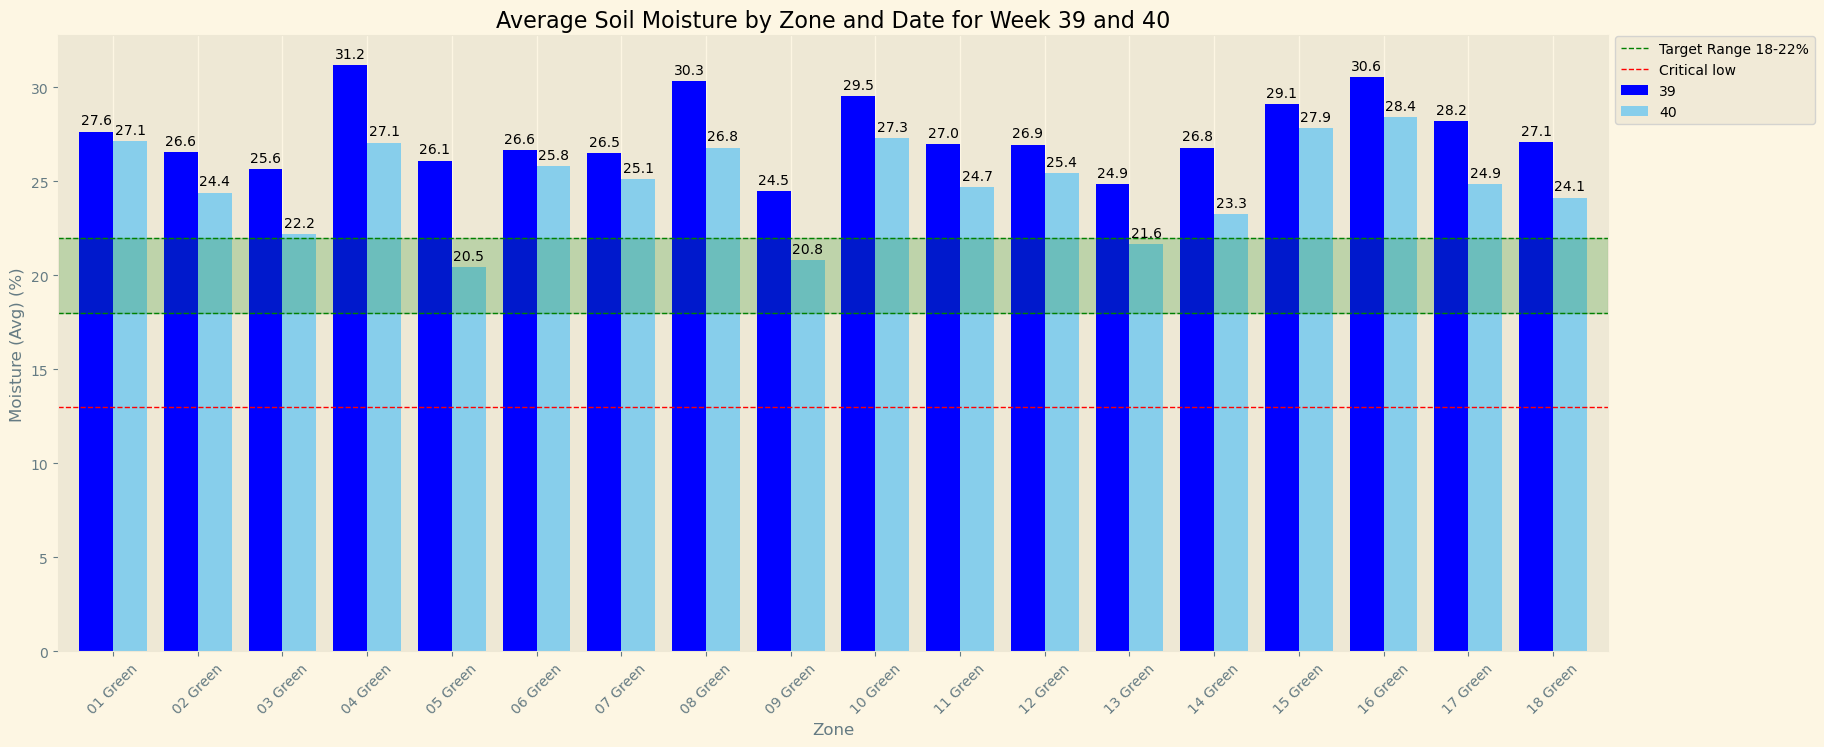

In [18]:

# Filter data for weeks 29 and 30 in 2024
weeks = [39, 40]
df_filtered = dfpogo[(dfpogo['Week'].isin(weeks)) & (dfpogo['Year'] == 2024)]

# Extract just the date part from 'Sample Date'
df_filtered['Dato'] = df_filtered['Dato'].dt.date

# Group by 'Zone' and 'Date' to calculate mean soil moisture
grouped_df = df_filtered.groupby(['Zone','Week'])['Moisture (Avg) (%)'].mean().unstack()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(20, 8), width=0.8, color=['Blue', 'skyblue'])
plt.title('Average Soil Moisture by Zone and Date for Week 39 and 40')
plt.xlabel('Zone')
plt.ylabel('Moisture (Avg) (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 8), 
                textcoords='offset points')



# Adding green dotted lines at 18% and 22%
plt.axhline(y=18, color='green', linestyle='--', linewidth=1, label='Target Range 18-22%')
plt.axhline(y=22, color='green', linestyle='--', linewidth=1 )

# Adding a red dotted line at 11%
plt.axhline(y=13, color='red', linestyle='--', linewidth=1, label='Critical low')

# Shading the area between 18% and 22% with light green
plt.fill_between(ax.get_xlim(), 18, 22, color='green', alpha=0.2)

# Adding legend with the red and green dotted lines
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1.01))

# Display the plot
plt.show()

In [ ]:
dfpogo[dfpogo['Week']== 31].count()

Zone                  58
Dataset               58
Moisture (Avg) (%)    58
Moisture (Min) (%)    58
Moisture (Max) (%)    58
Dato                  58
Time                  58
Week                  58
Year                  58
dtype: int64

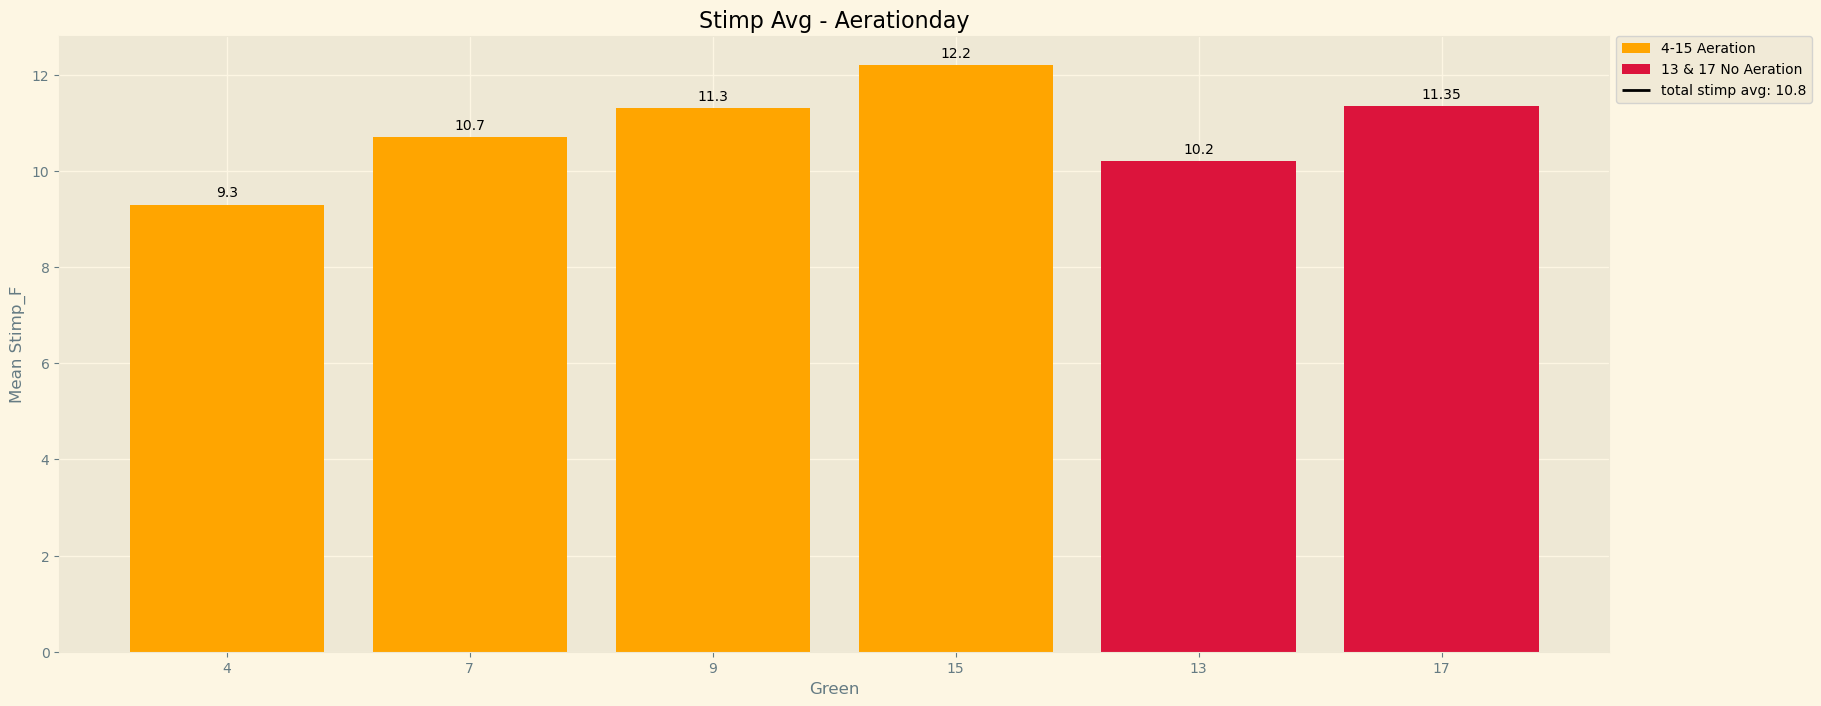

In [ ]:
# Filter data for the date 31/07/2024
df_filtered = dfstimp[dfstimp['Dato'] == '2024-07-31']

# Ensure 'Hul' column is in the correct format
df_filtered['Hul'] = df_filtered['Hul'].astype(str).str.extract('(\d+)').astype(int)

# Define the groups of greens
greens1 = [4, 7, 9, 15]
greens2 = [13, 17]

# Calculate the mean Stimp_F for each green in both groups
mean_stimp_f_greens1 = [df_filtered[df_filtered['Hul'] == green]['Stimp_F'].mean() for green in greens1]
mean_stimp_f_greens2 = [df_filtered[df_filtered['Hul'] == green]['Stimp_F'].mean() for green in greens2]

# Combine the data for plotting
all_greens = greens1 + greens2
all_mean_stimp_f = mean_stimp_f_greens1 + mean_stimp_f_greens2

# Calculate the total mean Stimp_F for all selected greens
total_mean_stimp_f = df_filtered[df_filtered['Hul'].isin(all_greens)]['Stimp_F'].mean()

# Creating the bar chart
plt.figure(figsize=(20, 8))

# Plotting bars for greens 4, 7, 9, 15
bars1 = plt.bar(range(len(greens1)), mean_stimp_f_greens1, color='orange', label='4-15 Aeration')

# Plotting bars for greens 13, 17
bars2 = plt.bar(range(len(greens1), len(greens1) + len(greens2)), mean_stimp_f_greens2, color='crimson', label='13 & 17 No Aeration')

# Adding labels and title
plt.xlabel('Green')
plt.ylabel('Mean Stimp_F')
plt.title('Stimp Avg - Aerationday')
plt.xticks(range(len(all_greens)), labels=[str(green) for green in all_greens])

# Adding the total mean to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='black', label=f'total stimp avg: {total_mean_stimp_f:.1f}'))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.945))

# Adding labels with the values on each bar
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Displaying the plot
plt.show()

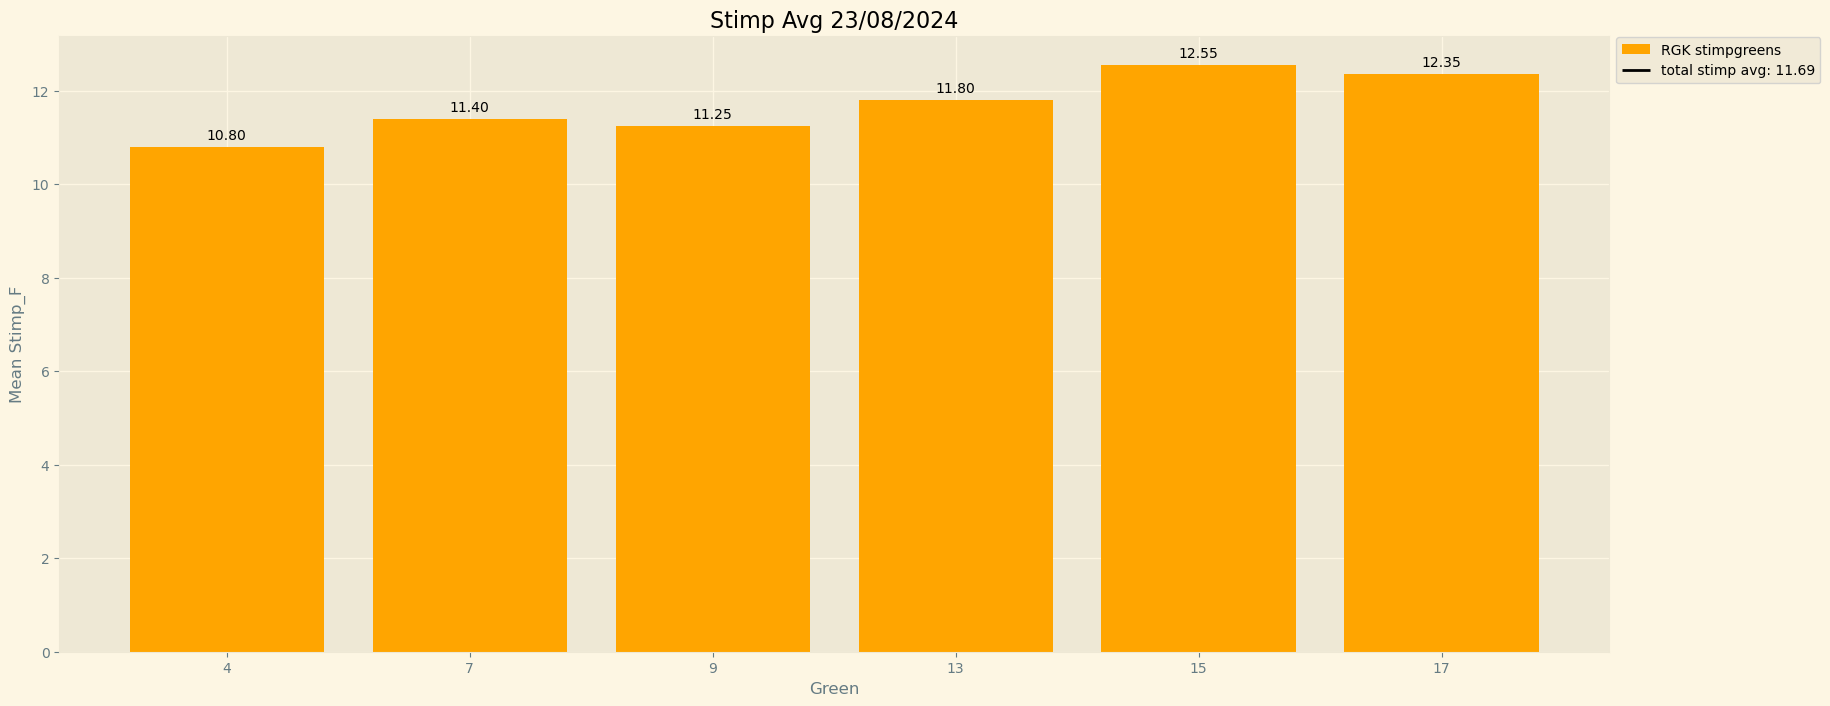

In [ ]:
# Filter the data for the date 07/08/2024
df_filtered = dfstimp[dfstimp['Dato'] == '2024-08-23']

# Ensure 'Hul' column is in the correct format
df_filtered['Hul'] = df_filtered['Hul'].astype(str).str.extract('(\d+)').astype(int)

# Define the greens
greens = [4, 7, 9,13,15,17]

# Calculate the mean Stimp_F for each green
mean_stimp_f = [df_filtered[df_filtered['Hul'] == green]['Stimp_F'].mean() for green in greens]

# Calculate the total mean Stimp_F for all selected greens
total_mean_stimp_f = df_filtered['Stimp_F'].mean()

# Creating the bar chart
plt.figure(figsize=(20, 8))

# Plotting bars for the greens
bars = plt.bar(range(len(greens)), mean_stimp_f, color='orange', label='RGK stimpgreens')

# Adding labels and title
plt.xlabel('Green')
plt.ylabel('Mean Stimp_F')
plt.title('Stimp Avg 23/08/2024')
plt.xticks(range(len(greens)), labels=[str(green) for green in greens])

# Adding the total mean to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='black', label=f'total stimp avg: {total_mean_stimp_f:.2f}'))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.960))

# Adding labels with the values on each bar
for bar, mean in zip(bars, mean_stimp_f):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{mean:.2f}', ha='center', va='bottom')

# Displaying the plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


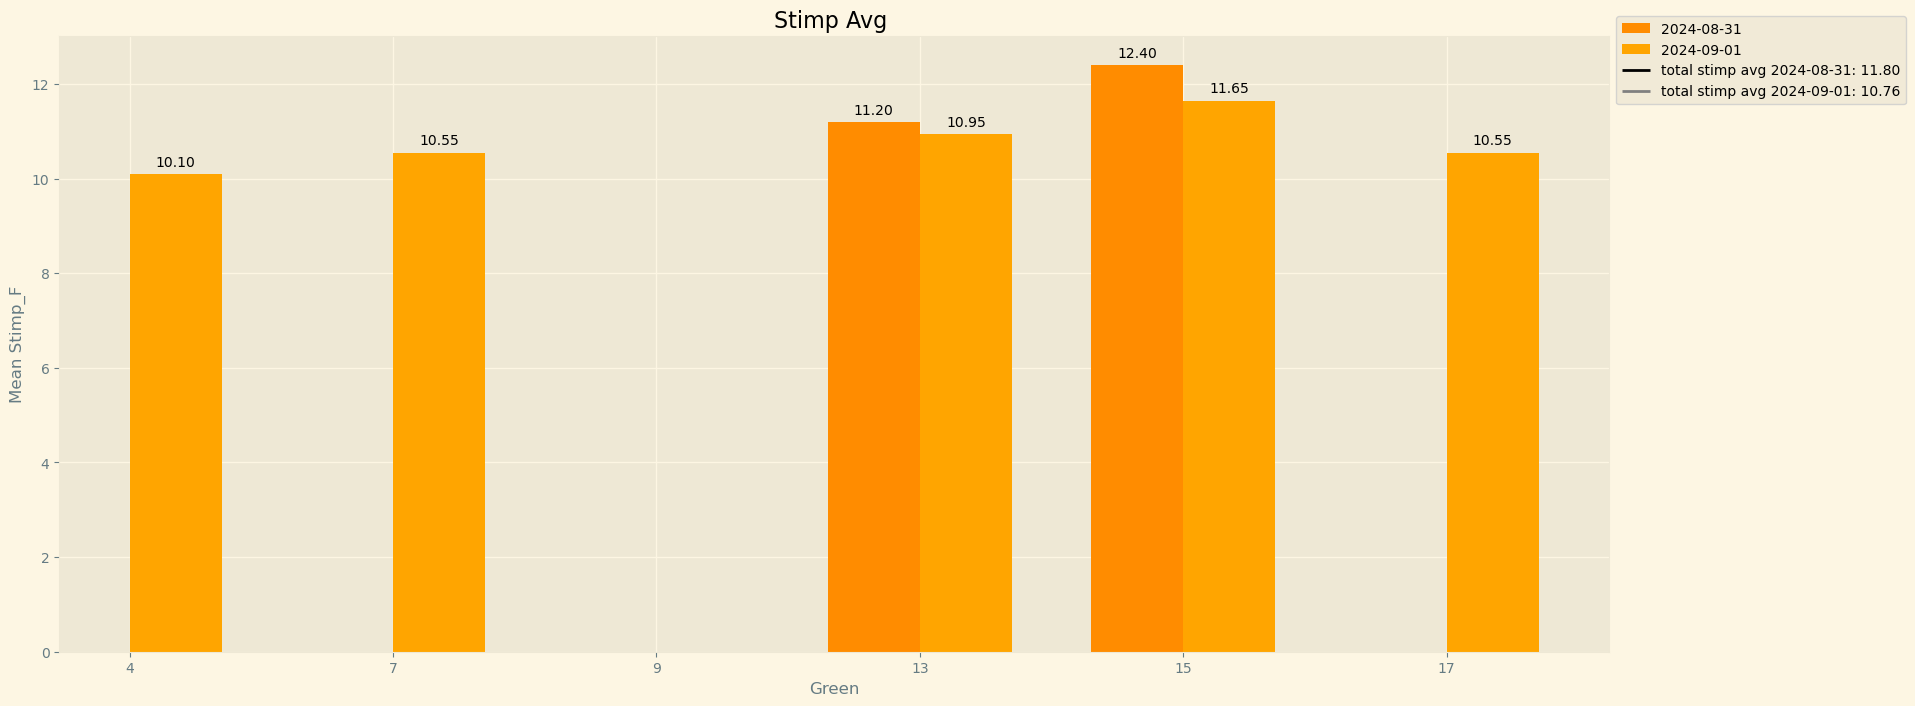

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the data for the two specific dates
date1 = '2024-08-31'
date2 = '2024-09-01'

df_filtered_date1 = dfstimp[dfstimp['Dato'] == date1]
df_filtered_date2 = dfstimp[dfstimp['Dato'] == date2]

# Ensure 'Hul' column is in the correct format
df_filtered_date1['Hul'] = df_filtered_date1['Hul'].astype(str).str.extract('(\d+)').astype(int)
df_filtered_date2['Hul'] = df_filtered_date2['Hul'].astype(str).str.extract('(\d+)').astype(int)

# Define the greens
greens = [4, 7, 9, 13, 15, 17]

# Calculate the mean Stimp_F for each green for both dates
mean_stimp_f_date1 = [df_filtered_date1[df_filtered_date1['Hul'] == green]['Stimp_F'].mean() for green in greens]
mean_stimp_f_date2 = [df_filtered_date2[df_filtered_date2['Hul'] == green]['Stimp_F'].mean() for green in greens]

# Calculate the total mean Stimp_F for all selected greens for both dates
total_mean_stimp_f_date1 = df_filtered_date1['Stimp_F'].mean()
total_mean_stimp_f_date2 = df_filtered_date2['Stimp_F'].mean()

# Creating the bar chart
plt.figure(figsize=(20, 8))

# Width of the bars
bar_width = 0.35
index = range(len(greens))

# Plotting bars for the two dates
bars1 = plt.bar(index, mean_stimp_f_date1, bar_width, color='darkorange', label=f'{date1}')
bars2 = plt.bar([i + bar_width for i in index], mean_stimp_f_date2, bar_width, color='orange', label=f'{date2}')

# Adding labels and title
plt.xlabel('Green')
plt.ylabel('Mean Stimp_F')
plt.title('Stimp Avg ')
plt.xticks([i + bar_width/2 for i in index], labels=[str(green) for green in greens])

# Adding the total mean to the legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.Line2D([], [], color='black', label=f'total stimp avg {date1}: {total_mean_stimp_f_date1:.2f}'))
handles.append(plt.Line2D([], [], color='grey', label=f'total stimp avg {date2}: {total_mean_stimp_f_date2:.2f}'))
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.960))

# Adding labels with the values on each bar
for bars, mean_stimp_f in zip([bars1, bars2], [mean_stimp_f_date1, mean_stimp_f_date2]):
    for bar, mean in zip(bars, mean_stimp_f):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{mean:.2f}', ha='center', va='bottom')

# Displaying the plot
plt.show()


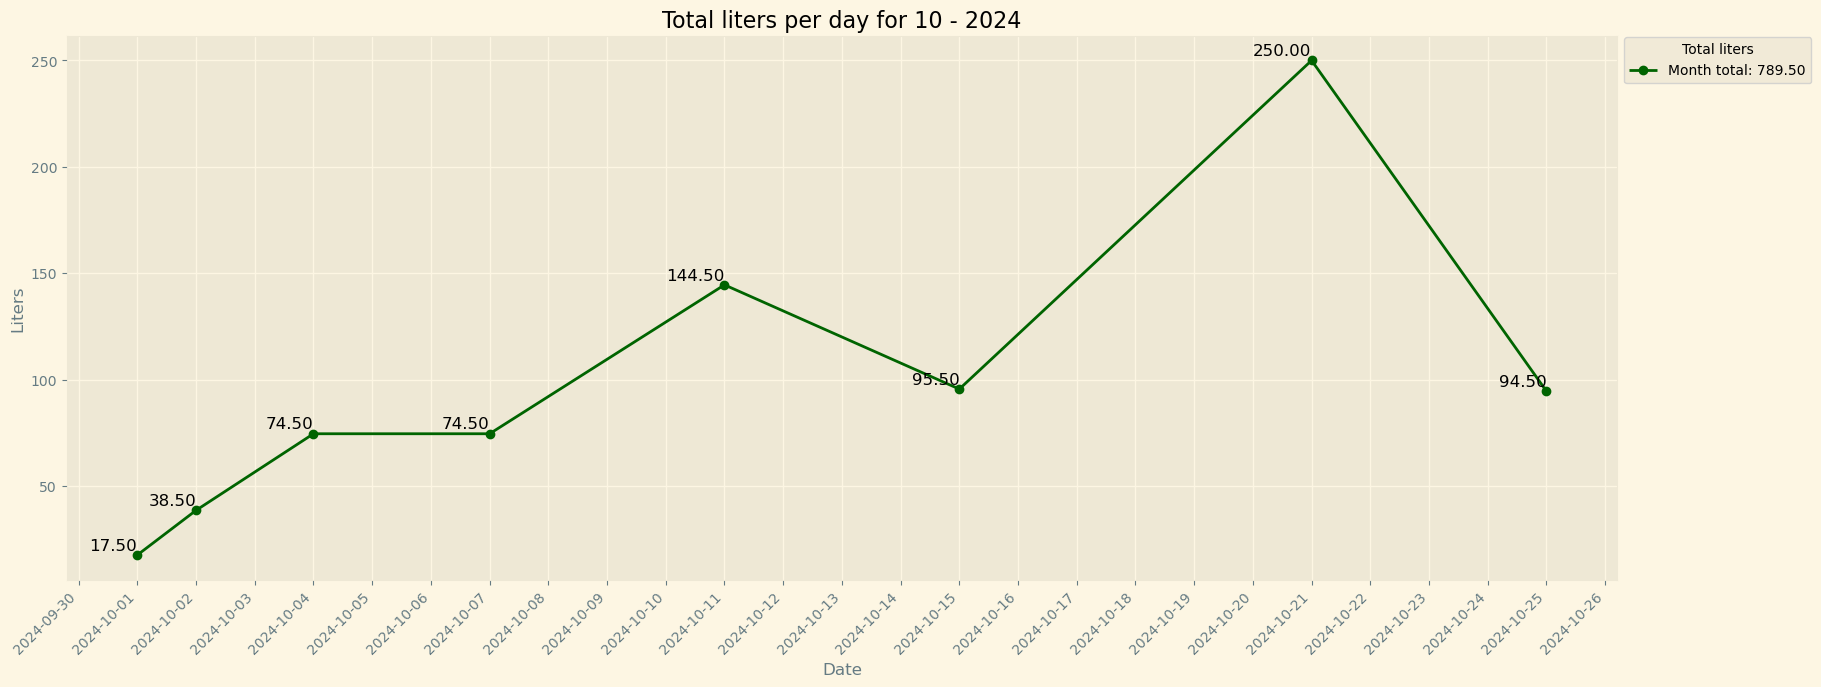

In [51]:
# Define the month and year
month = 10  # Example for August
year = 2024

# Filter the DataFrame to include only the specified month and year
line_month = dfklip[(dfklip['Year'] == year) & (dfklip['Dato'].dt.month == month)]

line_month['Hul'] = line_month['Hul'].astype(str)
line_month['Liter'] = line_month['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group the data by 'Dato' and sum the 'Liter' column
line_liter = line_month.groupby('Dato')['Liter'].sum()

# Calculate total liters for the entire month
total_month_liters = line_month['Liter'].sum()

# Plot the line graph
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title(f'Total liters per day for {month:02} - {year}')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Update the legend to show the total for the month
plt.legend([f'Month total: {total_month_liters:.2f}'], loc='upper right', title='Total liters', bbox_to_anchor=(1.13, 1.01))

plt.show()


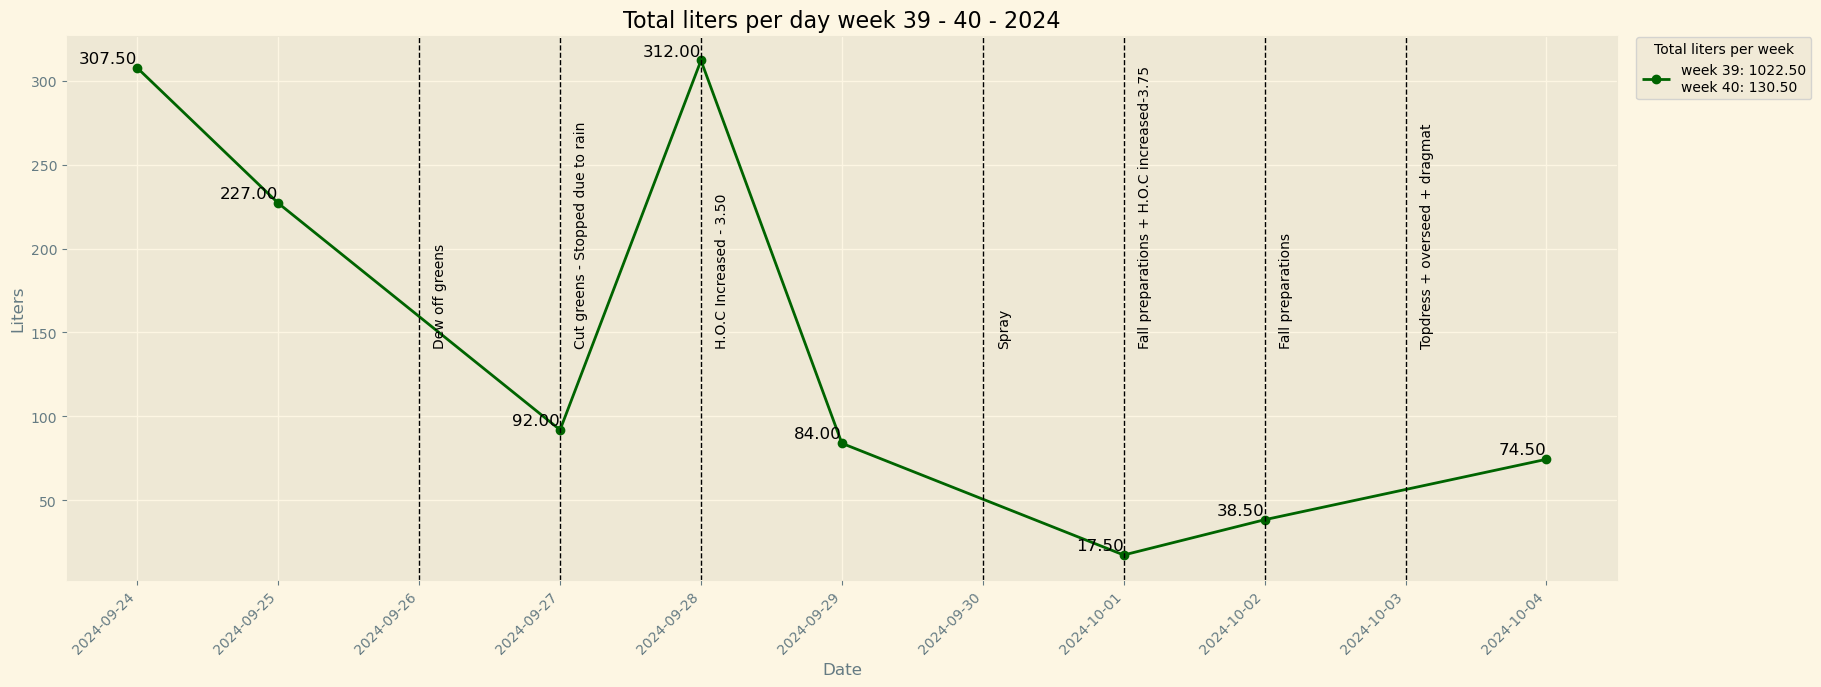

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Dato' columns are in datetime format
dfklip['Dato'] = pd.to_datetime(dfklip['Dato'], format='%d/%m/%Y')
dfevents['Dato'] = pd.to_datetime(dfevents['Dato'], format='%d/%m/%Y')

# Filter data for weeks 39 and 40 in 2024
weeks = [39, 40]
dfklip['Week'] = dfklip['Dato'].dt.isocalendar().week
dfklip['Year'] = dfklip['Dato'].dt.year

line_uge = dfklip[(dfklip['Week'].isin(weeks)) & (dfklip['Year'] == 2024)]

# Ensure 'Hul' is string and 'Liter' is properly formatted
line_uge['Hul'] = line_uge['Hul'].astype(str)
line_uge['Liter'] = line_uge['Liter'].astype(str).str.replace(',', '.').astype(float)

# Group the data by 'Dato' and sum the 'Liter' column
line_liter = line_uge.groupby('Dato')['Liter'].sum()

# Calculate total liters for each week separately
total_week_37_liters = line_uge[line_uge['Week'] == 39]['Liter'].sum()
total_week_38_liters = line_uge[line_uge['Week'] == 40]['Liter'].sum()

# Filter events for weeks 39 and 40, excluding "Cut greens" and "Roll greens"
dfevents['Week'] = dfevents['Dato'].dt.isocalendar().week
filtered_events = dfevents[(dfevents['Week'].isin(weeks)) & 
                           (dfevents['Dato'].dt.year == 2024) & 
                           (~dfevents['Event'].isin(['Cut greens', 'Roll greens']))]

# Combine multiple events on the same date into a single label
combined_event_description = {}
for date, group in filtered_events.groupby('Dato'):
    events = group['Event'].unique()
    if len(events) > 1:
        combined_event_description[date] = 'Multiple Events'
    else:
        combined_event_description[date] = events[0]

# Manually adjust specific event descriptions
combined_event_description[pd.Timestamp('2024-10-01')] = 'Fall preparations + H.O.C increased-3.75'
combined_event_description[pd.Timestamp('2024-10-02')] = 'Fall preparations'
combined_event_description[pd.Timestamp('2024-10-03')] = 'Topdress + overseed + dragmat'

# Plot the line graph with updated descriptions
plt.figure(figsize=(20, 8))
line_liter.plot(kind='line', marker='o', color='darkgreen')
plt.title('Total liters per day week 39 - 40 - 2024')
plt.xlabel('Date')
plt.ylabel('Liters')
plt.xticks(rotation=45)
plt.grid(True)

# Format the x-axis to display full dates
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())

# Annotate each data point with its value
for x, y in zip(line_liter.index, line_liter.values):
    plt.text(x, y + 0.9, f'{y:.2f}', ha='right', va='bottom', fontsize=12)

# Add vertical lines for combined event labels with the updated event descriptions
for date, description in combined_event_description.items():
    plt.axvline(x=date, color='black', linestyle='--', linewidth=1)
    plt.text(date + pd.Timedelta(days=0.1), line_liter.max() * 0.45, description, 
             rotation=90, verticalalignment='bottom')

# Update the legend to show totals for week 39 and week 40
plt.legend([f'week 39: {total_week_37_liters:.2f}\nweek 40: {total_week_38_liters:.2f}'], 
           loc='upper right', title='Total liters per week', bbox_to_anchor=(1.13, 1.01))

plt.show()
